In [49]:
from utils import *
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
db, engine, meta = db_connect()

In [3]:
tables = db_tables(meta)

In [43]:
house_xs = []
house_ys = []
senate_xs = []
senate_ys = []
enacted_bills = []
i = 0
total = get_bills_count(engine)
for key, bill in bills_stream(engine):
    if "cosponsors" in bill:
        xs = house_xs
        ys = house_ys
        if bill["bill_type"] == "s":
            xs = senate_xs
            ys = senate_ys
        xs.append(len([cosponsor for cosponsor in bill["cosponsors"] if cosponsor["withdrawn_at"] is None]))
        ys.append(1 if bill["enacted_as"] is not None else 0)
        if bill["enacted_as"] is not None:
            enacted_bills.append(bill)
    i += 1
    if i % 10000 == 0: 
        print("Finished {} of {}".format(i, total))

Finished 10000 of 248860
Finished 20000 of 248860
Finished 30000 of 248860
Finished 40000 of 248860
Finished 50000 of 248860
Finished 60000 of 248860
Finished 70000 of 248860
Finished 80000 of 248860
Finished 90000 of 248860
Finished 100000 of 248860
Finished 110000 of 248860
Finished 120000 of 248860
Finished 130000 of 248860
Finished 140000 of 248860
Finished 150000 of 248860
Finished 160000 of 248860
Finished 170000 of 248860
Finished 180000 of 248860
Finished 190000 of 248860
Finished 200000 of 248860
Finished 210000 of 248860
Finished 220000 of 248860
Finished 230000 of 248860
Finished 240000 of 248860


In [35]:
sum(house_ys) / len(house_ys)

0.030759576779831387

In [34]:
sum(senate_ys) / len(senate_ys)

0.030983309663717738

In [68]:
def plot_reg(xs, ys, title = "", xlab = "", ylab = ""):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(xs, ys)
    plt.scatter(xs, ys, alpha = 0.1)
    xbounds = np.array([min(xs), max(xs)])
    plt.plot(xbounds, intercept + slope * xbounds, "-", c = "r", linewidth = 4)
    plt.title('{}\nn={}\nSlope = {}, p = {}'.format(title, len(xs), slope, pvalue))
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

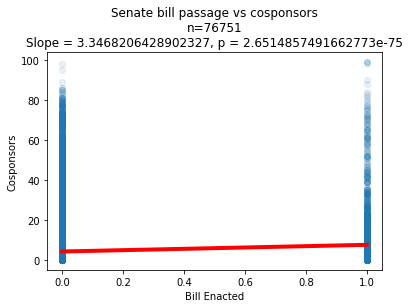

In [72]:
plot_reg(senate_ys, senate_xs, "Senate bill passage vs cosponsors", xlab = "Bill Enacted", ylab = "Cosponsors")

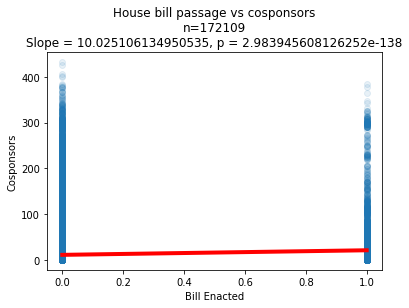

In [73]:
plot_reg(house_ys, house_xs, "House bill passage vs cosponsors", xlab = "Bill Enacted", ylab = "Cosponsors")